<a href="https://colab.research.google.com/github/SamAniedi/k_means_clustering/blob/main/Clustering_Using_K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset
df=pd.read_csv("taxstats2015.csv")
df.head()


,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,19684,1331,222191,20773,17264,27555,5917,51394,68531,1110
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,42054,4,48971,18508,67,28142,19359,137,90315,15544
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,19960,334,639499,9233,3071,15649,9115,6711,41670,5225
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,19722,481,32173,9385,4061,53976,10583,7676,54245,10373
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,26044,666,222993,11982,7358,32430,14835,12718,126486,20494


# New Section

# New Section

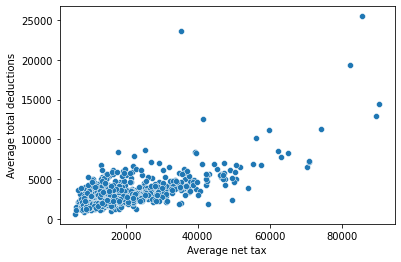

In [ ]:
# display a scatterplot

sns.scatterplot(x=df['Average net tax'],y=df['Average total deductions'],data=df)



In [ ]:
df=pd.read_csv("taxstats2015.csv", usecols=['Average net tax','Average total deductions'])
df.head()

,Average total deductions,Average net tax
0,2071,27555
1,3804,28142
2,1740,15649
3,3917,53976
4,3433,32430


In [ ]:
df.tail()

,Average total deductions,Average net tax
2468,2377,14788
2469,1218,9017
2470,2309,16574
2471,3039,28795
2472,2191,18141


In [ ]:
# perform clustering using the dataset

X=df[['Average net tax','Average total deductions']]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2,10):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X)
  print(k,"->",silhouette_score(X, kmeans.labels_))


2 -> 0.7463511627179947
3 -> 0.6119882102963004
4 -> 0.5938317978467145
5 -> 0.526336947741042
6 -> 0.5052498105822446
7 -> 0.5011951259746238
8 -> 0.4649287296640222
9 -> 0.47302950953842215


In [ ]:
y_preds = kmeans.predict(X)

In [ ]:
y_preds

array([6, 6, 4, ..., 4, 6, 4], dtype=int32)

In [ ]:
df['cluster'] = y_preds

In [ ]:
df.head(20)

,Average total deductions,Average net tax,cluster
0,2071,27555,6
1,3804,28142,6
2,1740,15649,4
3,3917,53976,7
4,3433,32430,2
5,3318,28239,6
6,4047,32172,2
7,3078,21511,1
8,2967,21479,1
9,2936,18434,4


In [ ]:
import numpy as np
df.pivot_table(values=['Average net tax','Average total deductions'],index='cluster', aggfunc=np.mean)
df

,Average total deductions,Average net tax,cluster
0,2071,27555,6
1,3804,28142,6
2,1740,15649,4
3,3917,53976,7
4,3433,32430,2
...,...,...,...
2468,2377,14788,0
2469,1218,9017,5
2470,2309,16574,4
2471,3039,28795,6


In [ ]:
import altair as alt

In [ ]:
chart = alt.Chart(df)
scatter_plot=chart.mark_circle()
scatter_plot.encode(x='Average net tax',y='Average total deductions',color='cluster:N')

alt.Chart(...)

In [ ]:
# perform clustering using the dataset

X=df[['Average net tax','Average total deductions']]

inertia = []

from sklearn.cluster import KMeans

for k in range(1, 10):  # for(int k=1; k<10; k++)
  kmeans = KMeans(n_clusters=k).fit(X)
  inertia.append(kmeans.inertia_)

inertia

[158645860207.44928,
 66550560210.69415,
 37083156794.36331,
 22538796508.948326,
 15718364091.551884,
 11531523581.959759,
 8784070767.763496,
 7277835942.006779,
 5998939024.194972]

In [ ]:
# generate k_values from range (1,10)

k_values = []

for k in range(1,10):
  k_values.append(k)

k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# using list comprehension

k_values = [k for k in range(1,10)]

k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# generate a dataframe called clusters

clusters = pd.DataFrame(data=zip(k_values,inertia), columns=['k_values','inertia'])
clusters.tail()

,k_values,inertia
4,5,1.571836e+10
5,6,1.153152e+10
6,7,8.784071e+09
7,8,7.277836e+09
8,9,5.998939e+09


In [ ]:
# this line will generate the elbow plot using the libray altair
# arguments/inputs: dataframe, x values (list), y values (list)

alt.Chart(clusters).mark_line().encode(x='k_values', y='inertia')

alt.Chart(...)

## Using the Elbow Method, we can see that the best value of K is 3!